In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import linregress
import requests
import json
from config import tmdb_api
from config import omdb_api
from pprint import pprint
import numpy as np

In [2]:
##DONT NEED THIS CELL ANYMORE
# #import and read Oscars-demographics-DFE.csv
# oscar_demographics_df = pd.read_csv('Oscars-demographics-DFE.csv', encoding='cp1252')
# oscar_demographics_df
# better_df = oscar_demographics_df[['_unit_id', 'person','race_ethnicity', 'sexual_orientation', 'year_of_award', 'movie', 'award', 'birthplace', 'date_of_birth']]
# better_df.head(-5)

In [3]:
##DONT NEED THIS CELL ANYMORE
# better_df['movie'].nunique()

In [4]:
##DONT NEED THIS CELL ANYMORE
# better_df['race_ethnicity'].value_counts()

In [5]:
##DONT NEED THIS CELL ANYMORE
# oscar_demographics_df.columns


In [6]:
##DONT NEED THIS CELL ANYMORE
#tmdb API; lets see what this does
# query = 'Precious'
# url = (f'https://api.themoviedb.org/3/search/movie?api_key={tmdb_api}&query={query}')
# query_url = url + query
# response = requests.get(query_url).json()
# response

#sample call to omdb API
# movie = 'Two Arabian Knights'
# url = f"http://www.omdbapi.com/?apikey={omdb_api}&t={movie}"
# response = requests.get(url).json()
# pprint(response)
# response.keys()

# print(response['Actors'])
#     #not sure we can collect this and put into DF based off it being multiple actors, but it is a string
# print(response['Rated'])
# print(response['imdbID'])
# print(response['Runtime'])
# print(response['imdbRating'])


In [7]:
##DONT NEED THIS CELL ANYMORE
#OMDB API
# copy_df = better_df

# movies = []
# ratings = []
# imdbIDs = []
# imdbRatings = []
# m_length = []


# for row in copy_df.iterrows():
#     print(row[1]['movie'])
#     movie = row[1]['movie']
    
# #     try:
        
#     #call to OMDB API
#     url = f"http://www.omdbapi.com/?apikey={omdb_api}&t={movie}"

#     response = requests.get(url).json()

#     #collect data from API

#     #         movie_rating = response['Rated']
#     movie_rating = response.get('Rated', np.nan)
#     imdbID = response.get('imdbID', np.nan)
#     movie_length = response.get('Runtime', np.nan)
#     imdb_rating = response.get('imdbRating', np.nan)

#     #parse results into row
#     movies.append(movie)
#     ratings.append(movie_rating)
#     imdbIDs.append(imdbID)
#     m_length.append(movie_length)
#     imdbRatings.append(imdb_rating)

        
#     except KeyError:
        
#         #getting KeyError for Desraeli
#         print(f"no movie rating for {movie} in imdb API. Appending 'not found'.")
#         ratings.append('NaN')
#         imdbIDs.append('NaN')
#         m_length.append('NaN')
#         imdbRatings.append('NaN')



In [8]:
#DONT NEED THIS CELL ANYMORE
#Turn rows into DF

# print(len(ratings))
# print(len(imdbIDs))
# print(len(m_length))
# print(len(imdbRatings))



# api_df = pd.DataFrame({'movie': movies,
#                        'Movie Rating': ratings,
#                        'imdbIDs': imdbIDs,
#                        'Movie Length (min)': m_length,
#                        'IMDB Rating': imdbRatings})
# api_df

In [9]:
#merge df's and save to csv for ease later
# merged_df = pd.merge(copy_df, api_df, on='movie', how='outer')
# merged_df.to_csv('awards_with_imdb.csv')
new_df = pd.read_csv('awards_with_imdb.csv')
del new_df['Unnamed: 0']
new_df

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
0,670454353,Lewis Milestone,White,Straight,1927,Two Arabian Knights,Best Director,"Chisinau, Moldova",30-Sep-1895,TV-G,tt0018515,92 min,6.7
1,670454354,Frank Lloyd,White,Straight,1930,The Divine Lady,Best Director,"Glasgow, Scotland",2-Feb-1886,Not Rated,tt0019824,99 min,6.2
2,670454355,Lewis Milestone,White,Straight,1931,All Quiet on the Western Front,Best Director,"Chisinau, Moldova",30-Sep-1895,Passed,tt0020629,152 min,8.0
3,670454356,Norman Taurog,White,Straight,1932,Skippy,Best Director,"Chicago, Il",23-Feb-1899,NaN,tt0060025,25 min,6.3
4,670454357,Frank Borzage,White,Straight,1933,Bad Girl,Best Director,"Salt Lake City, Ut",23-Apr-1894,Passed,tt0021635,90 min,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,670945834,Mo'Nique,Black,Straight,2010,Precious,Best Supporting Actress,"Woodlawn, Md",11-Dec-67,R,tt0929632,110 min,7.3
703,670945834,Mo'Nique,Black,Straight,2010,Precious,Best Supporting Actress,"Woodlawn, Md",11-Dec-67,R,tt0929632,110 min,7.3
704,670454766,Octavia Spencer,Black,Na,2012,The Help,Best Supporting Actress,"Montgomery, Al",25-May-72,PG-13,tt1454029,146 min,8.0
705,670454767,Anne Hathaway,White,Straight,2013,Les MisÌ©rables,Best Supporting Actress,"Brooklyn, Ny",12-Nov-82,NaN,NaN,NaN,NaN


In [10]:
#lets see what we can do with the 'best director' awards and imdb rating over time in this data set
best_directors = new_df.loc[new_df['award'] == 'Best Director']
best_directors.head()

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
0,670454353,Lewis Milestone,White,Straight,1927,Two Arabian Knights,Best Director,"Chisinau, Moldova",30-Sep-1895,TV-G,tt0018515,92 min,6.7
1,670454354,Frank Lloyd,White,Straight,1930,The Divine Lady,Best Director,"Glasgow, Scotland",2-Feb-1886,Not Rated,tt0019824,99 min,6.2
2,670454355,Lewis Milestone,White,Straight,1931,All Quiet on the Western Front,Best Director,"Chisinau, Moldova",30-Sep-1895,Passed,tt0020629,152 min,8.0
3,670454356,Norman Taurog,White,Straight,1932,Skippy,Best Director,"Chicago, Il",23-Feb-1899,NaN,tt0060025,25 min,6.3
4,670454357,Frank Borzage,White,Straight,1933,Bad Girl,Best Director,"Salt Lake City, Ut",23-Apr-1894,Passed,tt0021635,90 min,6.5


In [11]:
#find out how many years the year_of_awards covers
difference_in_years = best_directors['year_of_award'].max() - best_directors['year_of_award'].min()
difference_in_years
print(best_directors['year_of_award'].max())
print(best_directors['year_of_award'].min())
print(difference_in_years)
years = best_directors['year_of_award'].sort_values(ascending=True)

2013
1927
86


The r-squared is: 0.12004617451519974
P-value: 5.501222877813698e-06


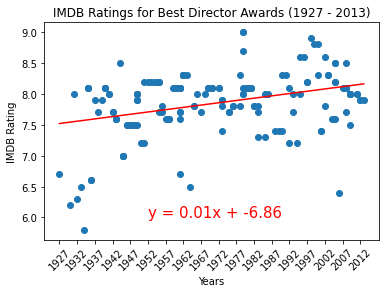

In [36]:
#make line graph
years = best_directors['year_of_award'].sort_values(ascending=True)
x_values = years
imdb_ratings = best_directors['IMDB Rating']
y_values = imdb_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1952,6),fontsize=15,color="red")
plt.xlabel('Years')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings for Best Director Awards (1927 - 2013)')
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
years_list = [1927, 1932, 1937, 1942, 1947, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997,
         2002, 2007, 2012]
ticks = years_list
labels = years_list
plt.xticks(ticks, labels, rotation=45) 
plt.savefig('imdb-best_director.png')

#### Analysis 
- with an r-squared value of .12, there is no correlation here between IMDB rating and Time (from years 1927-2013) for Best Director Awards.  

In [13]:
new_df.head()
best_actress = new_df.loc[new_df['award'] == 'Best Actress']
best_actress = best_actress.dropna(how='any')
years = best_actress['year_of_award'].sort_values(ascending=True)
best_actress

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
12,670454610,Claudette Colbert,White,Straight,1935,It Happened One Night,Best Actress,"Paris, France",13-Sep-1903,Approved,tt0025316,105 min,8.1
13,670454610,Claudette Colbert,White,Straight,1935,It Happened One Night,Best Actress,"Paris, France",13-Sep-1903,Approved,tt0025316,105 min,8.1
14,670454610,Claudette Colbert,White,Straight,1935,It Happened One Night,Best Actress,"Paris, France",13-Sep-1903,Approved,tt0025316,105 min,8.1
25,670454615,Vivien Leigh,White,Straight,1940,Gone with the Wind,Best Actress,"Darjeeling, India",5-Nov-13,Passed,tt0031381,238 min,8.1
26,670454615,Vivien Leigh,White,Straight,1940,Gone with the Wind,Best Actress,"Darjeeling, India",5-Nov-13,Passed,tt0031381,238 min,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,670454686,Sandra Bullock,White,Straight,2010,The Blind Side,Best Actress,"Arlington, Va",26-Jul-64,PG-13,tt0878804,129 min,7.6
631,670454687,Natalie Portman,White,Straight,2011,Black Swan,Best Actress,"Jerusalem, Israel",9-Jun-81,R,tt0947798,108 min,8.0
632,670454688,Meryl Streep,White,Straight,2012,The Iron Lady,Best Actress,"Summit, Nj",22-Jun-49,PG-13,tt1007029,105 min,6.4
633,670454689,Jennifer Lawrence,White,Na,2013,Silver Linings Playbook,Best Actress,"Louisville, Ky",15-Aug-90,R,tt1045658,122 min,7.7


The r-squared is: 0.16977626345188213
P-value: 1.9588088241367655e-07


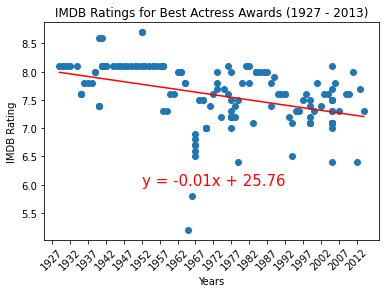

In [34]:
#make scatter graph for Best Actress over the years vs imdb rating
years = best_actress['year_of_award'].sort_values(ascending=True)
x_values = years
imdb_ratings = best_actress['IMDB Rating']
y_values = imdb_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1952,6),fontsize=15,color="red")
plt.xlabel('Years')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings for Best Actress Awards (1927 - 2013)')
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
years_list = [1927, 1932, 1937, 1942, 1947, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997,
         2002, 2007, 2012]
ticks = years_list
labels = years_list
plt.xticks(ticks, labels, rotation=45)
plt.savefig('imdb-best_actress.png')

In [15]:
new_df.head()
new_df['award'].value_counts()
best_supp_actress = new_df.loc[new_df['award'] == 'Best Supporting Actress']
best_supp_actress = best_supp_actress.dropna(how='any')


The r-squared is: 0.19545360971525474
P-value: 6.352497814471421e-08


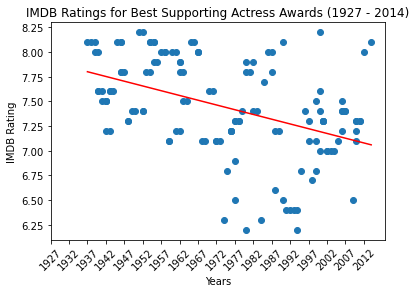

In [32]:
best_supp_actress
#make scatter graph for Best Supporting Actress over the years vs imdb rating
years = best_supp_actress['year_of_award'].sort_values(ascending=True)
x_values = years
imdb_ratings = best_supp_actress['IMDB Rating']
y_values = imdb_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1952,6),fontsize=15,color="red")
plt.xlabel('Years')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings for Best Supporting Actress Awards (1927 - 2014)')
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
years_list = [1927, 1932, 1937, 1942, 1947, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997,
         2002, 2007, 2012]
ticks = years_list
labels = years_list
plt.xticks(ticks, labels, rotation=45)
plt.savefig('imdb-best_supp_actress.png')

In [17]:
new_df['award'].value_counts()

Best Director              164
Best Actress               149
Best Supporting Actress    138
Best Supporting Actor      129
Best Actor                 127
Name: award, dtype: int64

In [28]:
new_df.head()
best_supp_actor = new_df.loc[new_df['award'] == 'Best Supporting Actor']
best_supp_actor = best_supp_actor.dropna(how='any')
years = best_supp_actor['year_of_award'].sort_values(ascending=True)
#get rid of all duplicate rows
best_supp_actor = best_supp_actor.drop_duplicates()
best_supp_actor.head()



78
78
The r-squared is: 0.04069649014486786
P-value: 0.07653459318496891


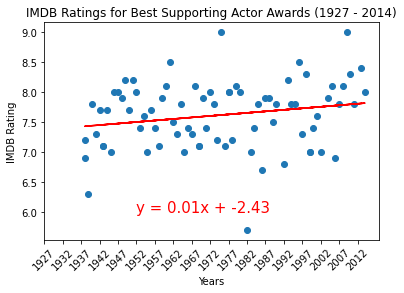

In [30]:
#make scatter graph for Best Supporting Actor over the years vs imdb rating
years = best_supp_actor['year_of_award']
x_values = years
imdb_ratings = best_supp_actor['IMDB Rating']
y_values = imdb_ratings
print(len(x_values))
print(len(y_values))

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1952,6),fontsize=15,color="red")
plt.xlabel('Years')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings for Best Supporting Actor Awards (1927 - 2014)')
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
years_list = [1927, 1932, 1937, 1942, 1947, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997,
         2002, 2007, 2012]
ticks = years_list
labels = years_list
plt.xticks(ticks, labels, rotation=45)
plt.savefig('imdb-best_supp_actor.png')

The r-squared is: 7.224926659120408e-06
P-value: 0.9807594448259791


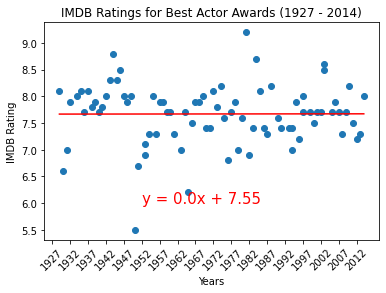

In [24]:
#build best actor only award df
new_df['award'].value_counts()
best_actor = new_df.loc[new_df['award'] == 'Best Actor']
best_actor = best_actor.dropna(how='any')
best_actor = best_actor.drop_duplicates()
years = best_actor['year_of_award'].sort_values(ascending=True)

# #make scatter graph for Best Supporting Actor over the years vs imdb rating
x_values = years
imdb_ratings = best_actor['IMDB Rating']
y_values = imdb_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1952,6),fontsize=15,color="red")
plt.xlabel('Years')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings for Best Actor Awards (1927 - 2014)')
print(f"The r-squared is: {rvalue**2}")
print(f'P-value: {pvalue}')
years_list = [1927, 1932, 1937, 1942, 1947, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997,
         2002, 2007, 2012]
ticks = years_list
labels = years_list
plt.xticks(ticks, labels, rotation=45)
plt.savefig('imdb-best_actor.png')

In [21]:
#Million Dollar Baby - won 3 awards
new_df = new_df.drop_duplicates()
new_df['movie'].value_counts()
million_dollar_baby = new_df[new_df['movie'] == 'Million Dollar Baby']
million_dollar_baby = million_dollar_baby.drop(index=289)
million_dollar_baby = million_dollar_baby.drop(index=294)


In [22]:
# Network - won 3 awards
new_df['movie'].value_counts()
network = new_df[new_df['movie'] == 'Network']
network = network.drop(index=376)


In [23]:
#West Side Story - won 3 awards, 2 directors
new_df['movie'].value_counts()
west_side = new_df[new_df['movie'] == 'West Side Story']



In [24]:
#Going My Way - won 3 awards
new_df['movie'].value_counts()
going_myway = new_df[new_df['movie'] == 'Going My Way']


In [25]:
# Mrs. Miniver - won 3 awards
new_df['movie'].value_counts()
miniver = new_df[new_df['movie'] == 'Mrs. Miniver']


In [26]:
# Sierra Madre - won 2 awards
new_df['movie'].value_counts().head(20)
sierra_madre = new_df[new_df['movie'] == 'The Treasure of the Sierra Madre']
sierra_madre = sierra_madre.drop(index=97)
sierra_madre

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
91,670454374,John Huston,White,Straight,1949,The Treasure of the Sierra Madre,Best Director,"Nevada, Mo",5-Aug-06,Passed,tt0040897,126 min,8.2
94,670454538,Walter Huston,White,Straight,1949,The Treasure of the Sierra Madre,Best Supporting Actor,"Toronto, Ontario, Canada",6-Apr-1884,Passed,tt0040897,126 min,8.2


In [27]:
#won 2 awards - had two directors for best director
new_df['movie'].value_counts().head(20)
new_df[new_df['movie'] == 'No Country for Old Men']

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
152,670454394,Joel Coen,White,Straight,2008,No Country for Old Men,Best Director,"St. Louis Park, Mn",29-Nov-54,R,tt0477348,122 min,8.1
155,670454434,Ethan Coen,White,Straight,2008,No Country for Old Men,Best Director,"St. Louis Park, Mn",21-Sep-57,R,tt0477348,122 min,8.1
158,670454597,Javier Bardem,Hispanic,Straight,2008,No Country for Old Men,Best Supporting Actor,"Las Palmas De Gran Canaria, Canary Islands",1-Mar-69,R,tt0477348,122 min,8.1


In [28]:
#Virginia Woolf won 2 awards
new_df['movie'].value_counts().head(20)
virginia_woolf = new_df[new_df['movie']=="Who's Afraid of Virginia Woolf?"]
virginia_woolf = virginia_woolf.drop(index=576)
virginia_woolf

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
570,670454642,Elizabeth Taylor,White,Straight,1967,Who's Afraid of Virginia Woolf?,Best Actress,"London, England",27-Feb-32,Not Rated,tt0061184,131 min,8.0
573,670454721,Sandy Dennis,White,Bisexual,1967,Who's Afraid of Virginia Woolf?,Best Supporting Actress,"Hastings, Ne",27-Apr-37,Not Rated,tt0061184,131 min,8.0


In [29]:
#A streetcar named desire had 3 awards
new_df['movie'].value_counts().head(20)
streetcar = new_df[new_df['movie'] == 'A Streetcar Named Desire']

In [30]:
# Kramer won 3 awards
new_df['movie'].value_counts().head(20)
kramer = new_df[new_df['movie'] == 'Kramer vs. Kramer']


In [31]:
#on the waterfront won 3 awards
new_df['movie'].value_counts().head(20)
waterfront = new_df[new_df['movie'] == 'On the Waterfront']

In [32]:
#gone with the wind won 3 awards
new_df['movie'].value_counts().head(20)
gone_wind = new_df[new_df['movie'] == 'Gone with the Wind']

In [33]:
#Terms of endearment won 3 awards
new_df['movie'].value_counts().head(20)
terms = new_df[new_df['movie'] == 'Terms of Endearment']

In [34]:
#deer hunter won 2 awards
new_df['movie'].value_counts().head(20)
deer_hunter = new_df[new_df['movie'] == 'The Deer Hunter']
deer_hunter = deer_hunter.drop(index=197)
deer_hunter

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
191,670454405,Michael Cimino,White,Straight,1979,The Deer Hunter,Best Director,New York City,3-Feb-39,R,tt0077416,183 min,8.1
194,670454568,Christopher Walken,White,Straight,1979,The Deer Hunter,Best Supporting Actor,"Astoria, Ny",31-Mar-43,R,tt0077416,183 min,8.1


In [35]:
#shakespeare won only 2 awards
new_df['movie'].value_counts().head(20)
new_df[new_df['movie'] == 'Shakespeare in Love']


,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
612,670454675,Gwyneth Paltrow,White,Straight,1999,Shakespeare in Love,Best Actress,"Los Angeles, Ca",27-Sep-72,R,tt0138097,123 min,7.1
615,670454753,Judi Dench,White,Straight,1999,Shakespeare in Love,Best Supporting Actress,"York, North Yorkshire, England",9-Dec-34,R,tt0138097,123 min,7.1
618,670945693,Gwyneth Paltrow,White,Straight,1999,Shakespeare in Love,Best Actress,"Los Angeles, Ca",27-Sep-72,R,tt0138097,123 min,7.1


In [36]:
#from here to eternity won 3 awards
new_df['movie'].value_counts().head(20)
eternity = new_df[new_df['movie'] == 'From Here to Eternity']



In [37]:
#The best years of our lives won 3 awards
new_df['movie'].value_counts().head(20)
best_years = new_df[new_df['movie'] == 'The Best Years of Our Lives']
best_years

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
78,670454372,William Wyler,White,Straight,1947,The Best Years of Our Lives,Best Director,"Mulhouse, Haut-Rhin, Alsace, France",1-Jul-1902,Approved,tt0036868,170 min,8.0
81,670454458,Fredric March,White,Straight,1947,The Best Years of Our Lives,Best Actor,"Racine, Wi",31-Aug-1897,Approved,tt0036868,170 min,8.0
84,670454536,Harold Russell,White,Straight,1947,The Best Years of Our Lives,Best Supporting Actor,"North Sydney, Nova Scotia, Canada",14-Jan-14,Approved,tt0036868,170 min,8.0


In [38]:
#It happened one night won 3 awards
new_df['movie'].value_counts().head(20)
one_night = new_df[new_df['movie']=='It Happened One Night']
one_night

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
6,670454359,Frank Capra,White,Straight,1935,It Happened One Night,Best Director,"Bisacquino, Sicily, Italy",18-May-1897,Approved,tt0025316,105 min,8.1
9,670454446,Clark Gable,White,Straight,1935,It Happened One Night,Best Actor,"Cadiz, Oh",1-Feb-1901,Approved,tt0025316,105 min,8.1
12,670454610,Claudette Colbert,White,Straight,1935,It Happened One Night,Best Actress,"Paris, France",13-Sep-1903,Approved,tt0025316,105 min,8.1


In [39]:
#Cabaret won 3 awards
new_df['movie'].value_counts().head(20)
cabaret = new_df[new_df['movie'] == 'Cabaret']
cabaret
three_or_more = cabaret.merge(one_night, how='outer')

In [42]:
#combine all dataframes of movies with 3 or more awards
three_or_more = three_or_more.merge(best_years, how='outer')
three_or_more = three_or_more.merge(eternity, how='outer')
#4
three_or_more = three_or_more.merge(terms, how='outer')
#5
three_or_more = three_or_more.merge(gone_wind, how='outer')
#6
three_or_more = three_or_more.merge(waterfront, how='outer')

#7
three_or_more = three_or_more.merge(kramer, how='outer')
#8
three_or_more = three_or_more.merge(streetcar, how='outer')
#9
three_or_more = three_or_more.merge(miniver, how='outer')
#10
three_or_more = three_or_more.merge(going_myway, how='outer')
#11
three_or_more = three_or_more.merge(west_side, how='outer')
#12
three_or_more = three_or_more.merge(network, how='outer')
#13
three_or_more = three_or_more.merge(million_dollar_baby, how='outer')
three_or_more

,_unit_id,person,race_ethnicity,sexual_orientation,year_of_award,movie,award,birthplace,date_of_birth,Movie Rating,imdbIDs,Movie Length (min),IMDB Rating
0,670454399,Bob Fosse,White,Straight,1973,Cabaret,Best Director,"Chicago, Il",23-Jun-27,PG,tt0068327,124 min,7.8
1,670454562,Joel Grey,White,Gay,1973,Cabaret,Best Supporting Actor,"Cleveland, Oh",11-Apr-32,PG,tt0068327,124 min,7.8
2,670454649,Liza Minnelli,White,Na,1973,Cabaret,Best Actress,"Los Angeles, Ca",12-Mar-46,PG,tt0068327,124 min,7.8
3,670454359,Frank Capra,White,Straight,1935,It Happened One Night,Best Director,"Bisacquino, Sicily, Italy",18-May-1897,Approved,tt0025316,105 min,8.1
4,670454446,Clark Gable,White,Straight,1935,It Happened One Night,Best Actor,"Cadiz, Oh",1-Feb-1901,Approved,tt0025316,105 min,8.1
5,670454610,Claudette Colbert,White,Straight,1935,It Happened One Night,Best Actress,"Paris, France",13-Sep-1903,Approved,tt0025316,105 min,8.1
6,670454372,William Wyler,White,Straight,1947,The Best Years of Our Lives,Best Director,"Mulhouse, Haut-Rhin, Alsace, France",1-Jul-1902,Approved,tt0036868,170 min,8.0
7,670454458,Fredric March,White,Straight,1947,The Best Years of Our Lives,Best Actor,"Racine, Wi",31-Aug-1897,Approved,tt0036868,170 min,8.0
8,670454536,Harold Russell,White,Straight,1947,The Best Years of Our Lives,Best Supporting Actor,"North Sydney, Nova Scotia, Canada",14-Jan-14,Approved,tt0036868,170 min,8.0
9,670454379,Fred Zinnemann,White,Straight,1954,From Here to Eternity,Best Director,"Vienna, Austria",29-Apr-07,Passed,tt0045793,118 min,7.6
